In [1]:
#Modelos de AutoML para pronosticar el INPC General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
plt.rc('font', family='Times New Roman')

In [2]:
#Creamos el dataframe

dataset = pd.read_excel('IPC_series.xlsx',sheet_name='IPC', parse_dates=['fecha'])
descripcion1=pd.DataFrame(dataset.describe())
descripcion1
train_data = dataset.iloc[0:396, 0:12]
test_data = dataset.iloc[396:411 ,0:12]


In [7]:
dataset

,fecha,item_id,ipc,inp,m1,sn,sr,pml,e,cetes28,cetes91,cetesdif,0
0,1989-01-31,ipc,6.349024,NaN,1.914647e+07,NaN,NaN,NaN,2.3100,50.7800,50.6575,42.0975,1
1,1989-02-28,ipc,6.435184,NaN,1.929388e+07,NaN,NaN,NaN,2.3380,49.1525,49.3950,40.5550,2
2,1989-03-31,ipc,6.504945,NaN,1.942008e+07,NaN,NaN,NaN,2.3690,47.7860,48.8080,39.6680,3
3,1989-04-30,ipc,6.602224,NaN,1.979879e+07,NaN,NaN,NaN,2.3970,50.0875,51.5475,42.5875,4
4,1989-05-31,ipc,6.693099,NaN,2.033392e+07,NaN,NaN,NaN,2.4300,51.8325,53.8275,45.0875,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,2022-11-30,ipc,125.997000,-0.240753,6.602503e+09,160.49840,104.50,100.9154,19.3250,9.4150,10.1725,5.8525,407
407,2022-12-31,ipc,126.478000,0.004631,6.926065e+09,212.29670,137.70,97.0634,19.4143,9.9560,10.5340,6.1740,408
408,2023-01-31,ipc,127.336000,0.417539,6.670315e+09,163.75630,105.50,101.1821,18.7872,10.6125,10.8825,6.1925,409
409,2023-02-28,ipc,128.046000,-0.034532,6.639891e+09,164.82540,105.60,97.5423,18.4023,10.9225,11.2875,6.4975,410


In [3]:
train_data = TimeSeriesDataFrame.from_data_frame(
    train_data,
    id_column="item_id",
    timestamp_column="fecha"
)
train_data.head()

ipc  inp          m1  sn  sr  pml      e  cetes28  \
item_id timestamp                                                            
ipc     1989-01-31  6.349024  NaN  19146466.0 NaN NaN  NaN  2.310  50.7800   
        1989-02-28  6.435184  NaN  19293875.0 NaN NaN  NaN  2.338  49.1525   
        1989-03-31  6.504945  NaN  19420077.0 NaN NaN  NaN  2.369  47.7860   
        1989-04-30  6.602224  NaN  19798791.0 NaN NaN  NaN  2.397  50.0875   
        1989-05-31  6.693099  NaN  20333925.0 NaN NaN  NaN  2.430  51.8325   

                    cetes91  cetesdif  
item_id timestamp                      
ipc     1989-01-31  50.6575   42.0975  
        1989-02-28  49.3950   40.5550  
        1989-03-31  48.8080   39.6680  
        1989-04-30  51.5475   42.5875  
        1989-05-31  53.8275   45.0875

In [4]:
#En caso de valores en blanco en las series
train_data = train_data.fill_missing_values()
train_data

ipc       inp            m1        sn     sr  \
item_id timestamp                                                         
ipc     1989-01-31    6.349024  0.652000  1.914647e+07   77.0318   96.7   
        1989-02-28    6.435184  0.652000  1.929388e+07   77.0318   96.7   
        1989-03-31    6.504945  0.652000  1.942008e+07   77.0318   96.7   
        1989-04-30    6.602224  0.652000  1.979879e+07   77.0318   96.7   
        1989-05-31    6.693099  0.652000  2.033392e+07   77.0318   96.7   
...                        ...       ...           ...       ...    ...   
        2021-08-31  113.899000  0.320738  5.854176e+09  143.9769  103.7   
        2021-09-30  114.601000  0.367977  5.880840e+09  146.4010  104.8   
        2021-10-31  115.561000  1.223382  5.936066e+09  147.9091  105.0   
        2021-11-30  116.884000  1.056783  6.105346e+09  146.1829  102.6   
        2021-12-31  117.308000  0.619087  6.377134e+09  194.1877  135.8   

                        pml        e  cetes28  cetes91  cetesdif  
item_id timestamp                                                 
ipc     1989-01-31  94.5598   2.3100  50.7800  50.6575   42.0975  
        1989-02-28  94.5598   2.3380  49.1525  49.3950   40.5550  
        1989-03-31  94.5598   2.3690  47.7860  48.8080   39.6680  
        1989-04-30  94.5598   2.3970  50.0875  51.5475   42.5875  
        1989-05-31  94.5598   2.4300  51.8325  53.8275   45.0875  
...                     ...      ...      ...      ...       ...  
        2021-08-31  98.1646  20.2293   4.4550   4.8400    4.7900  
        2021-09-30  93.8768  20.3060   4.5500   4.8840    4.8440  
        2021-10-31  98.7500  20.1930   4.8400   5.2750    5.2250  
        2021-11-30  97.9952  21.8185   5.0475   5.4625    5.4125  
        2021-12-31  96.0645  20.5835   5.2880   5.6360    5.5760  

[396 rows x 10 columns]

In [5]:
#Establecemos la variable objetivo
target = 'ipc'
#Ruta para guardar el modelo
save_path = 'series_ipc_covfinal_best1'  # specifies folder to store trained models

In [6]:
#Entrenamos el catálogo de modelos
predictor = TimeSeriesPredictor(
    prediction_length=12,
    path=save_path,
    target=target,
    eval_metric="MSE",
)

predictor.fit(
    train_data,
    presets="best_quality",
    time_limit=9999,
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: best_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'MSE',
 'hyperparameter_tune_kwargs': {'num_trials': 10,
                                'scheduler': 'local',
                                'searcher': 'auto'},
 'hyperparameters': 'best_quality',
 'prediction_length': 12,
 'random_seed': None,
 'target': 'ipc',
 'time_limit': 9999}
Provided training data set with 396 rows, 1 items (item = single time series). Average time series length is 396.0.
Training artifacts will be saved to: C:\Users\Erik Rosas\DB tesina\series_ipc_covfinal_best1
AutoGluon will save models to series_ipc_covfinal_best1\
AutoGluon will gauge predictive performance using evaluation metric: 'MSE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following

  0%|          | 0/10 [00:00<?, ?it/s]

Stopping HPO due to exhausted search space: 2 of 2 possible configs ran.
	Trained 2 models while tuning Theta.
	-14.2634      = Validation score (-MSE)
	1.38    s     = Total tuning time
Hyperparameter tuning model: ARIMA. Tuning model for up to 908.99s of the 9998.87s remaining.
	-6.9696       = Validation score (-MSE)
	0.00    s     = Training runtime
	0.14    s     = Validation (prediction) runtime
Hyperparameter tuning model: AutoETS. Tuning model for up to 908.99s of the 9998.87s remaining.
	-6.8946       = Validation score (-MSE)
	0.00    s     = Training runtime
	27.77   s     = Validation (prediction) runtime
Hyperparameter tuning model: DynamicOptimizedTheta. Tuning model for up to 908.99s of the 9998.87s remaining.
	-9.0164       = Validation score (-MSE)
	0.00    s     = Training runtime
	13.81   s     = Validation (prediction) runtime
Hyperparameter tuning model: DeepAR. Tuning model for up to 908.99s of the 9998.87s remaining.


  0%|          | 0/10 [00:00<?, ?it/s]

	Stopping HPO to satisfy time limit...
	Trained 1 models while tuning DeepAR.
	-4.8274       = Validation score (-MSE)
	674.45  s     = Total tuning time
Hyperparameter tuning model: AutoARIMA. Tuning model for up to 908.99s of the 9998.87s remaining.
	-188.4484     = Validation score (-MSE)
	0.00    s     = Training runtime
	13.40   s     = Validation (prediction) runtime
Hyperparameter tuning model: TemporalFusionTransformer. Tuning model for up to 908.99s of the 9998.87s remaining.
	-5.3878       = Validation score (-MSE)
	779.89  s     = Training runtime
	0.02    s     = Validation (prediction) runtime
Hyperparameter tuning model: SimpleFeedForward. Tuning model for up to 908.99s of the 9998.87s remaining.


  0%|          | 0/10 [00:00<?, ?it/s]

Stopping HPO due to exhausted search space: 3 of 3 possible configs ran.
	Trained 3 models while tuning SimpleFeedForward.
	-1.1987       = Validation score (-MSE)
	156.88  s     = Total tuning time
Fitting simple weighted ensemble.
	-1.1987       = Validation score (-MSE)
	4.97    s     = Training runtime
	0.03    s     = Validation (prediction) runtime
Training complete. Models trained: ['Naive', 'SeasonalNaive', 'ETS', 'Theta\\T1', 'Theta\\T2', 'ARIMA', 'AutoETS', 'DynamicOptimizedTheta', 'DeepAR\\T1', 'AutoARIMA', 'TemporalFusionTransformer', 'SimpleFeedForward\\T1', 'SimpleFeedForward\\T2', 'SimpleFeedForward\\T3', 'WeightedEnsemble']
Total runtime: 1686.47 s
Best model: SimpleFeedForward\T3
Best model score: -1.1987


In [6]:


# Establecemos el conjunto de validación
test_data = TimeSeriesDataFrame.from_data_frame(
    test_data,
    id_column="item_id",
    timestamp_column="fecha"
)



In [7]:
predictor = TimeSeriesPredictor.load(save_path)

In [8]:
predictor.fit_summary(verbosity=1)

****************** Summary of fit() ******************
Estimated performance of each model:
                        model   score_val  pred_time_val  fit_time_marginal  \
0            WeightedEnsemble   -1.198670       0.031243           4.972408   
1        SimpleFeedForward\T3   -1.198670       0.031243          53.242149   
2        SimpleFeedForward\T2   -1.817801       0.028631          57.980811   
3        SimpleFeedForward\T1   -2.905270       0.143100          45.393568   
4                   DeepAR\T1   -4.827370       0.162142         674.247022   
5   TemporalFusionTransformer   -5.387762       0.016016         779.887155   
6                     AutoETS   -6.894557      27.774866           0.000000   
7                       ARIMA   -6.969619       0.141443           0.000000   
8       DynamicOptimizedTheta   -9.016412      13.814970           0.000000   
9                         ETS  -10.470063       1.322755           0.000000   
10                   Theta\T2  -14.2633

{'model_types': {'Naive': 'NaiveModel',
  'SeasonalNaive': 'SeasonalNaiveModel',
  'ETS': 'ETSModel',
  'Theta\\T1': 'ThetaModel',
  'Theta\\T2': 'ThetaModel',
  'ARIMA': 'ARIMAModel',
  'AutoETS': 'AutoETSModel',
  'DynamicOptimizedTheta': 'DynamicOptimizedThetaModel',
  'DeepAR\\T1': 'DeepARModel',
  'AutoARIMA': 'AutoARIMAModel',
  'TemporalFusionTransformer': 'TemporalFusionTransformerModel',
  'SimpleFeedForward\\T1': 'SimpleFeedForwardModel',
  'SimpleFeedForward\\T2': 'SimpleFeedForwardModel',
  'SimpleFeedForward\\T3': 'SimpleFeedForwardModel',
  'WeightedEnsemble': 'TimeSeriesGreedyEnsemble'},
 'model_performance': {'Naive': -22.828828583333337,
  'SeasonalNaive': -38.96532891666667,
  'ETS': -10.47006346870829,
  'Theta\\T1': -15.945148213840449,
  'Theta\\T2': -14.263379354590024,
  'ARIMA': -6.969618942772468,
  'AutoETS': -6.894556976636898,
  'DynamicOptimizedTheta': -9.016412384739525,
  'DeepAR\\T1': -4.827369562184427,
  'AutoARIMA': -188.44842509077503,
  'TemporalFus

In [13]:
#Hacemos la predicción en base al mejor modelo en la predicción fuera de muestra
predictions = predictor.predict(train_data,model='Theta\T2')
predictions.head()

Global seed set to 123


mean         0.1         0.2         0.3  \
item_id timestamp                                                    
ipc     2022-01-31  117.445370  117.141198  117.245614  117.320906   
        2022-02-28  117.582772  117.152608  117.300274  117.406752   
        2022-03-31  117.720174  117.193332  117.374186  117.504594   
        2022-04-30  117.857576  117.249231  117.458063  117.608646   
        2022-05-31  117.994977  117.314827  117.548309  117.716665   

                           0.4         0.5         0.6         0.7  \
item_id timestamp                                                    
ipc     2022-01-31  117.385239  117.445370  117.505502  117.569835   
        2022-02-28  117.497734  117.582772  117.667810  117.758792   
        2022-03-31  117.616024  117.720174  117.824324  117.935753   
        2022-04-30  117.737313  117.857576  117.977838  118.106505   
        2022-05-31  117.860520  117.994977  118.129435  118.273289   

                           0.8         0.9  
item_id timestamp                           
ipc     2022-01-31  117.645127  117.749543  
        2022-02-28  117.865270  118.012937  
        2022-03-31  118.066162  118.247016  
        2022-04-30  118.257088  118.465920  
        2022-05-31  118.441646  118.675127

In [15]:
#Hacemos la predicción en base al mejor modelo en la predicción fuera de muestra
predictions = predictor.predict(train_data)
predictions.head()

Global seed set to 123


mean         0.1         0.2         0.3  \
item_id timestamp                                                    
ipc     2022-01-31  119.459793  117.263573  118.211700  118.730316   
        2022-02-28  119.927742  117.609207  118.611626  119.158875   
        2022-03-31  120.378029  117.861748  118.948723  119.542793   
        2022-04-30  120.922981  118.504662  119.550873  120.121567   
        2022-05-31  121.329292  118.811890  119.900826  120.494926   

                           0.4         0.5         0.6         0.7  \
item_id timestamp                                                    
ipc     2022-01-31  119.117912  119.459793  119.801674  120.189270   
        2022-02-28  119.567482  119.927742  120.288010  120.696609   
        2022-03-31  119.986633  120.378029  120.769432  121.213272   
        2022-04-30  120.547501  120.922981  121.298462  121.724396   
        2022-05-31  120.938377  121.329292  121.720207  122.163658   

                           0.8         0.9  
item_id timestamp                           
ipc     2022-01-31  120.707886  121.656013  
        2022-02-28  121.243866  122.246269  
        2022-03-31  121.807343  122.894318  
        2022-04-30  122.295090  123.341301  
        2022-05-31  122.757759  123.846695

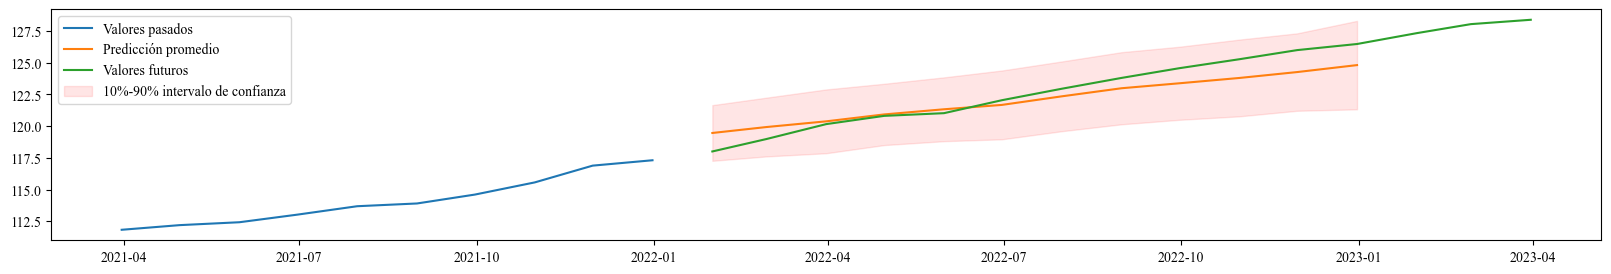

In [11]:
plt.figure(figsize=(20, 3))

item_id = "ipc"
y_past = train_data.loc[item_id]["ipc"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["ipc"][-20:]

plt.plot(y_past[-10:], label="Valores pasados")
plt.plot(y_pred["mean"], label="Predicción promedio")
plt.plot(y_test, label="Valores futuros")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% intervalo de confianza"
)
plt.legend();

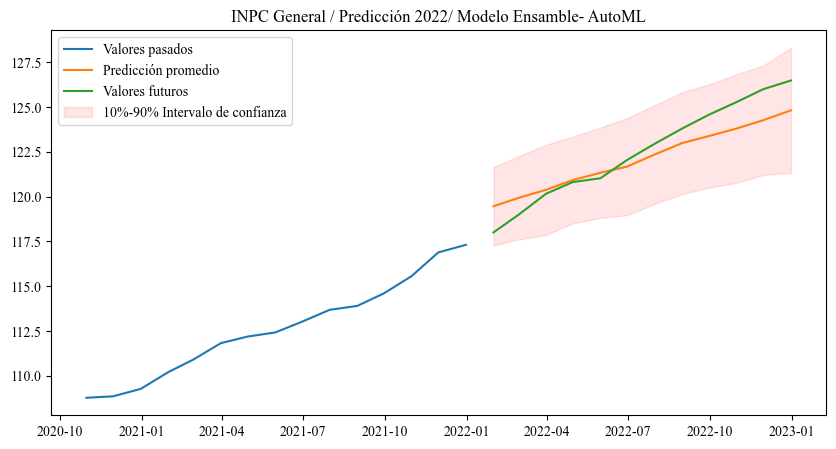

In [16]:
#Gráfico usado en la tesina
plt.figure(figsize=(10, 5))

item_id = "ipc"
y_past = train_data.loc[item_id]["ipc"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["ipc"][-15:+12]

plt.plot(y_past[-15:], label="Valores pasados")
plt.plot(y_pred["mean"], label="Predicción promedio")
plt.plot(y_test, label="Valores futuros")
plt.title('INPC General / Predicción 2022/ Modelo Ensamble- AutoML')
plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% Intervalo de confianza"
)
plt.legend();
import os
carpeta = 'gráficos_AutoML'
if not os.path.exists(carpeta):
    os.makedirs(carpeta)
ruta_archivo = os.path.join(carpeta, 'ipc_pred_2022_Wensenmble.png')
plt.savefig(ruta_archivo, dpi=300, bbox_inches='tight')


In [ ]:
#Guardar el gráfico
import os
carpeta = 'gráficos_AutoML'
if not os.path.exists(carpeta):
    os.makedirs(carpeta)
ruta_archivo = os.path.join(carpeta, 'ipc_sub_pred_2022_ETS.png')
plt.savefig(ruta_archivo, dpi=300, bbox_inches='tight')


In [17]:
#Ahora pronostiquemos la crisis de 2008
test_data_n = dataset.iloc[216:240 ,0:3]

# TimeSeriesDataFrame can also be loaded directly from a file
test_data_n = TimeSeriesDataFrame.from_data_frame(
    test_data_n,
    id_column="item_id",
    timestamp_column="fecha"
)



In [18]:
test_data_n = train_data.iloc[204:228 ,0:12]

In [ ]:
predictor.leaderboard(test_data_n, silent=True)

In [23]:
#Hacemos la predicción en base al mejor modelo en la predicción fuera de muestra
predictions = predictor.predict(test_data_n)
predictions.head()

Global seed set to 123


mean        0.1        0.2        0.3        0.4  \
item_id timestamp                                                           
ipc     2008-01-31  66.187149  64.983681  65.502953  65.787186  65.999687   
        2008-02-29  66.390106  65.122665  65.670372  65.969574  66.193047   
        2008-03-31  66.607979  65.236290  65.828491  66.152405  66.394470   
        2008-04-30  66.838676  65.519035  66.089661  66.401123  66.633667   
        2008-05-31  67.010506  65.639839  66.232422  66.555954  66.797523   

                          0.5        0.6        0.7        0.8        0.9  
item_id timestamp                                                          
ipc     2008-01-31  66.187149  66.374619  66.587112  66.871346  67.390617  
        2008-02-29  66.390106  66.587173  66.810638  67.109848  67.657547  
        2008-03-31  66.607979  66.821487  67.063553  67.387466  67.979668  
        2008-04-30  66.838676  67.043694  67.276230  67.587700  68.158318  
        2008-05-31  67.010506  67.223495  67.465065  67.788597  68.381180

In [20]:
test_data_n1 = train_data.iloc[204:240 ,0:12]

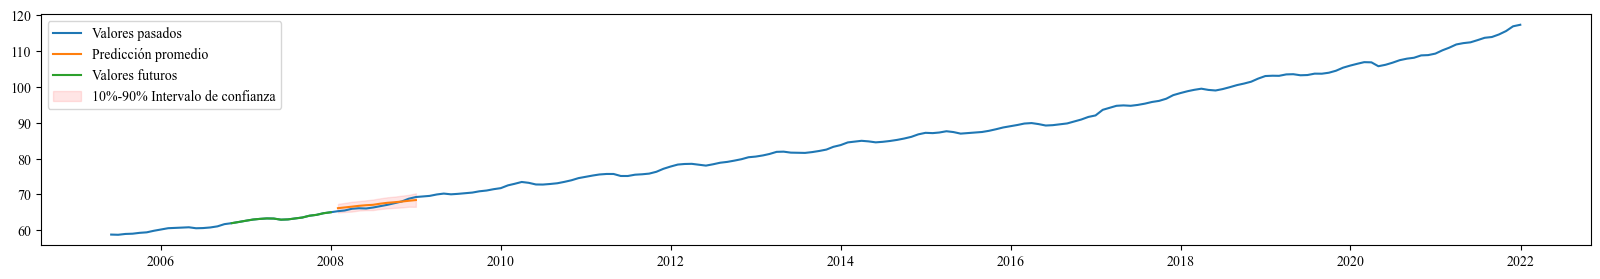

In [21]:
plt.figure(figsize=(20, 3))

item_id = "ipc"
y_past = train_data.loc[item_id]["ipc"]
y_pred = predictions.loc[item_id]
y_test = test_data_n.loc[item_id]["ipc"][-15:]

plt.plot(y_past[-200:], label="Valores pasados")
plt.plot(y_pred["mean"], label="Predicción promedio")
plt.plot(y_test, label="Valores futuros")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% Intervalo de confianza"
)
plt.legend();

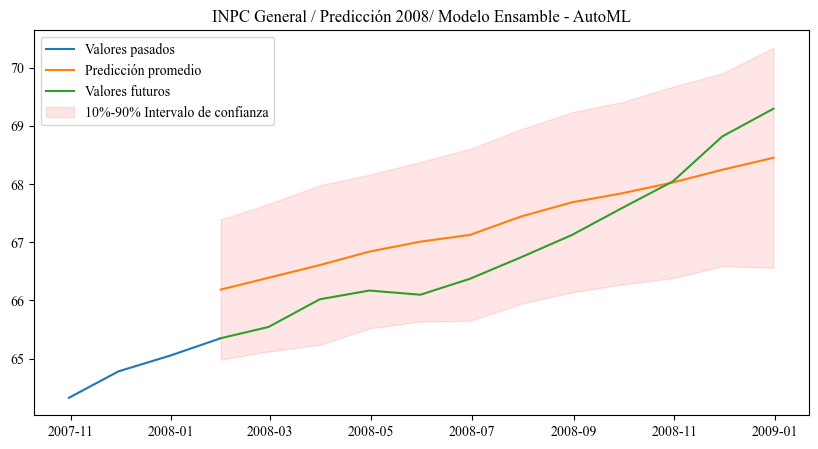

In [22]:
plt.figure(figsize=(10, 5))

item_id = "ipc"
y_past = train_data.loc[item_id]["ipc"][225:+229]
y_pred = predictions.loc[item_id]
y_test = test_data_n1.loc[item_id]["ipc"][-12:]

plt.plot(y_past[-200:+252], label="Valores pasados")
plt.plot(y_pred["mean"], label="Predicción promedio")
plt.plot(y_test, label="Valores futuros")
plt.title('INPC General / Predicción 2008/ Modelo Ensamble - AutoML')
plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% Intervalo de confianza"
)
plt.legend();